# Evaluation
This notebook is for inspecting the data and produce the desired results. It will use dataframes to do so.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import sys, os, csv, re
import numpy as np
from scipy import stats
os.chdir("..")

import src.parse as parse
from src.plot import plot_all, automatic_plotting

In [2]:
files = [file.rstrip(".vrp") for file in os.listdir("Instances/Uchoa") if (not file.endswith("sol"))]

methods = ["SPPRC","cyc2","ng8","ng20"]

In [3]:
dfs = {}
columns = ["ID",'instance','method','terminated','n',"K",'total time','sol_val']
finished_columns = ['final bound']
data = pd.DataFrame(columns=columns + finished_columns)
pattern = r"(X-n(\d+)-k(\d+))-(\w+)\.log"
for i, log in enumerate((log for log in os.listdir("output_uchoa"))):
    ID = log.strip(".log")
    instance, n, K, method = re.search(pattern, log).groups()
    log = f"output_uchoa/{log}"
    finished = parse.log_finished(log)
    sol_val = parse.parse_sol_val(instance)
    
    df = parse.parse_output(log)
    df["total time"] = df["total time"].cumsum()
    df = df[df.method == method]
    dfs[f'{instance}-{method}'] = df
    if finished:
        data = pd.concat((data,pd.DataFrame([[ID, instance,method, finished,n,K, df['total time'].iloc[-1], sol_val, df['upper_bound'].iloc[-1]]],columns=columns+finished_columns)))
    else:
        data = pd.concat((data,pd.DataFrame([[ID, instance,method, finished,n,K, df['total time'].iloc[-1], sol_val]],columns=columns)))
data = data.set_index("ID")
data['n'] = data['n'].astype(int)
data['total time'] = data['total time'].astype(float)
data['n/K'] = data['n'].astype(float) / data['K'].astype(float)
data['lb/I'] = data['final bound'].astype(float) / data['sol_val'].astype(float)

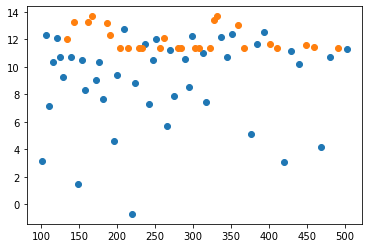

In [15]:
df = data.loc[data.method == "ng20"].copy()
df['div'] = df['n'].astype(float) / df['K'].astype(float)
df1 = df.loc[df.terminated == True]
df2 = df.loc[df.terminated == False]
# plt.scatter(df['div'],np.log(df['total time']))
# df2.sort_values("div")
plt.scatter(df1['n'],np.log(df1['total time']))
plt.scatter(df2['n'],np.log(df2['total time']))
#TODO: Hier vier Subplots machen, die jeweils die Laufzeiten angeben für die vier Methoden

In [34]:
df = data.loc[data.method == "ng20"].copy()
df['buckets'] = (df['n'] / 50).round(0)
df1 = df.loc[df.terminated == True]
df2 = df.loc[df.terminated == False]
freq1 = df1.groupby('buckets').count()['instance']
freq2 = df2.groupby('buckets').count()['instance']
freq2.loc[2] = 0

freq1 += freq2

# # plt.scatter(df['div'],np.log(df['total time']))
# # df2.sort_values("div")
# plt.scatter(df1['buckets'],np.log(df1['total time']))
# plt.scatter(df2['buckets'],np.log(df2['total time']))
# np.vstack((freq1.to_numpy(),freq2.to_numpy()))

arr = pd.DataFrame((freq1,freq2),dtype=int).to_numpy()
# arr
stats.chi2_contingency(arr)

(2.892957736707737,
 0.9408942419792152,
 8,
 array([[ 4.35789474, 10.16842105, 10.89473684, 10.16842105, 11.62105263,
          7.98947368,  5.81052632,  5.08421053,  2.90526316],
        [ 1.64210526,  3.83157895,  4.10526316,  3.83157895,  4.37894737,
          3.01052632,  2.18947368,  1.91578947,  1.09473684]]))

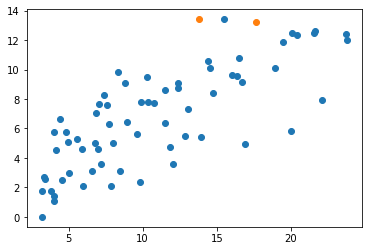

In [38]:
df = data.loc[data.method == "ng8"]
df1 = df.loc[df.terminated == True]
df2 = df.loc[df.terminated == False]
plt.scatter(df1['n/K'],np.log(df1['total time']))
plt.scatter(df2['n/K'],np.log(df2['total time']))

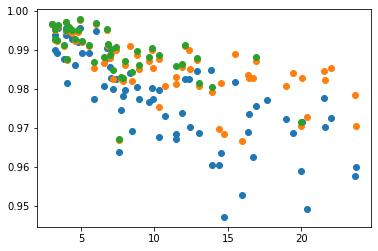

In [25]:
# Die Bound Qualität scheint zu sinken, je höher n/K ist.
df1 = data[data.method == "cyc2"]
df2 = data[data.method == "ng8"]
df3 = data[data.method == "ng20"]
plt.scatter(df1["n/K"],df1['lb/I'])
plt.scatter(df2["n/K"],df2['lb/I'])
plt.scatter(df3["n/K"],df3['lb/I'])
plt.show()

In [9]:
data.loc[(data.method == "ng20") & (data.terminated == False)]

,instance,method,terminated,n,K,total time,sol_val,final bound,n/K,lb/I
ID,,,,,,,,,,
X-n284-k15-ng20,X-n284-k15,ng20,False,284,15,86702.1,20226\n,NaN,18.933333,NaN
X-n256-k16-ng20,X-n256-k16,ng20,False,256,16,86471.9,18839\n,NaN,16.000000,NaN
X-n167-k10-ng20,X-n167-k10,ng20,False,167,10,881888.6,20557\n,NaN,16.700000,NaN
X-n233-k16-ng20,X-n233-k16,ng20,False,233,16,86570.7,19230\n,NaN,14.562500,NaN
X-n367-k17-ng20,X-n367-k17,ng20,False,367,17,90707.5,22814\n,NaN,21.588235,NaN
X-n331-k15-ng20,X-n331-k15,ng20,False,331,15,884047.3,31102\n,NaN,22.066667,NaN
X-n449-k29-ng20,X-n449-k29,ng20,False,449,29,109982.8,55233\n,NaN,15.482759,NaN
X-n190-k8-ng20,X-n190-k8,ng20,False,190,8,218124.6,16980\n,NaN,23.750000,NaN
X-n459-k26-ng20,X-n459-k26,ng20,False,459,26,92471.5,24139\n,NaN,17.653846,NaN


## Create Table

In [29]:
hierarchy = {"ng20":"ng8","ng8":"cyc2","cyc2":"SPPRC"}

c = 0.99

data['I'] = np.nan 
data['t'] = np.nan
data['lb_rel'] = np.nan

for index, row in data.iterrows():
    if row['terminated']:
        df = dfs[index]
        if row['method'] in hierarchy.keys():
            instance = row["instance"]
            method = row["method"]
            bound_sup = data['final bound'][f"{instance}-{hierarchy[method]}"]
            bound_c = row['final bound'] * c
            df_beaten = df[df['lower_bound'] >= bound_sup]
            df_c = df[df['lower_bound'] >= bound_c]
            
            data.loc[index,'lb_rel'] = bound_sup / row['final bound']
            data.loc[index, 'I'] = df_beaten.shape[0] - 1
            data.loc[index, 't'] = df_beaten['total time'].iloc[-1] - df_beaten.iloc[0,df_beaten.columns.get_loc('total time')]
            
            data.loc[index, 'Ic'] = df_c.shape[0] - 1
            data.loc[index, 'tc'] = df_c['total time'].iloc[-1] - df_c.iloc[0,df_c.columns.get_loc('total time')]
    
data["t/I"] = data['t'] / (data["I"])
data["%"] = data['t'].divide(data['total time'],fill_value=np.nan)
data["%c"] = data['tc'].divide(data['total time'],fill_value=np.nan)
data["tt"] = data['total time']
data = data.round({"total time":0, "t":0,"tc":0, "%":2,"%c":2,"t/I":0})

TODO: Wie wäre es sich hier noch anzuschauen, was Signale zum erkennen von Tailing Off sind? An der Stelle könnte ich mir die Bounds anschauen.

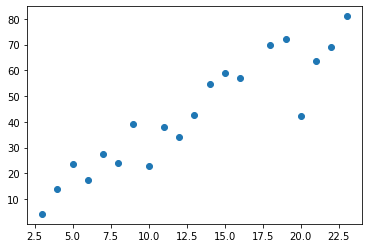

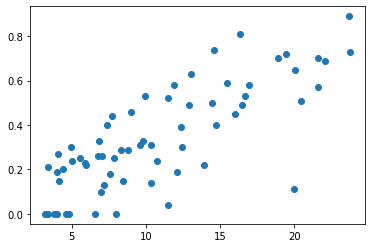

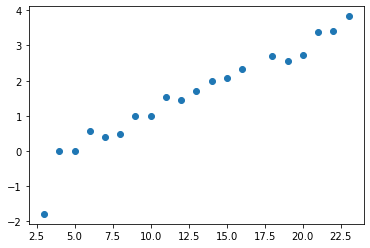

In [31]:
table = data[['instance','method','I','t','tt',"%","t/I","n/K"]]
table = table[table.method != "SPPRC"]
# table = table[table.method == "ng8"]
table["n/K"] = table["n/K"].astype(int)
table["%"] = (table["%"]*100)
table = table.groupby(["n/K","method"]).mean().unstack('method')
table.columns = table.columns.swaplevel()
_, index = table.columns.sortlevel()
table = table.iloc[:,index]
# ser = table[("","n/K")]
table = table[['cyc2','ng8','ng20']]
# table.style.format("{:.0f}")
plt.scatter(table.index,table['ng8',"%"])
plt.show()
# Die Streuung scheint unterschiedlich groß zu sein! Bei n8 etwas kleiner, ber cyc2 deutlich größer
subset = data[data.method == "ng8"]
plt.scatter(subset["n/K"],subset["%"])
plt.show()
plt.scatter(table.index,np.log(table['ng8',"I"]))
plt.show()
# Das ganze scheint ebenso für cyc2 und % zu gelten.
# Aber nicht für ng20!

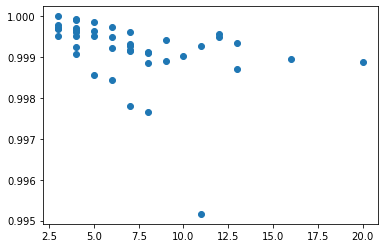

In [28]:
df = data.copy()
df["n/K"] = df["n/K"].astype(int)
df = df[df.method == 'ng8']
plt.scatter(df['n/K'],df['lb_rel'])

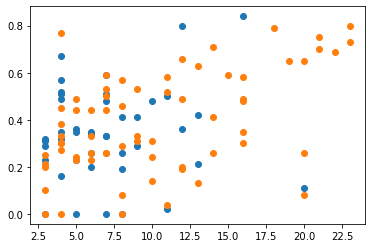

In [36]:
df = data.copy()
df["n/K"] = df["n/K"].astype(int)
df1 = df[df.method == 'ng20']
df2 = df[df.method == 'ng8']
plt.scatter(df1['n/K'],df1['%c'])
plt.scatter(df2['n/K'],df2['%c'])

In [59]:
table = data[['instance','method','I','t','tt',"%","t/I","n/K"]]
table = table[table.method != "SPPRC"]
table = table.pivot(index=["instance","n/K"],columns='method')
table = table.reset_index("n/K")
table.columns = table.columns.swaplevel()
_, index = table.columns.sortlevel()
table = table.iloc[:,index]
ser = table[("","n/K")]
table = table[['cyc2','ng8','ng20']]
table.insert(0,"n/K",ser)
# # format_dict = {("ng8","%"):"{:.0%}".format, ("ng20","%"):"{:.0%}".format, ("cyc2","%"):"{:.0%}".format}
# # table.iloc[:46].to_latex("output/table_small.tex",formatters=format_dict,float_format="%.0f",na_rep="-")
# # table.iloc[46:].to_latex("output/table_large.tex",formatters=format_dict,float_format="%.0f",na_rep="-")
table.style.format("{:.0f}")